## **Deep Learning**
In this section We will build a simple multilayer perceptron network(**MLP**) in TensorFlow

In [25]:
# Lets import the required libraries
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

### **Load Dataset**
We will be using MNIST dataset of handwritten digits

Just run the cell below to load dataset

In [19]:
mnist = keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print("No. of training examples = ",x_train.shape[0])
print("Size of each image in dataset = ",x_train.shape[1:])
print("No. of test examples = ",x_test.shape[0])

No. of training examples =  60000
Size of each image in dataset =  (28, 28)
No. of test examples =  10000


label: 4       3       8       8       3       

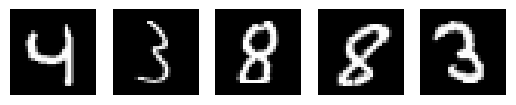

In [22]:
# Run this cell to visualize some of the images from dataset

n = 5    # = no. of images to visualize

index = np.random.choice(x_train.shape[0],5)  # choose random index
print("label: ",end="")

for i,ind in enumerate(index):
    plt.subplot(1,n,i+1)
    plt.imshow(x_train[ind],cmap="gray")
    plt.axis("off")
    print(y_train[ind],end="       ")

plt.show()

#### Preprocess dataset
Since we are building a MLP model the input to the model should be a vector rather than a 28 by 28 matrix.

So your **First Task** is to flatten the images

(Hint: use *reshape()* method of arrays...)

Next, create validation dataset out of training dataset.

You can use 50K images for training and 10K for validation

In [35]:
mnist = keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train_flatten = x_train.reshape(x_train.shape[0], 28*28)
x_test_flatten = x_test.reshape(x_test.shape[0], 28*28)


n_validation = 10000
x_validation = x_train_flatten[-n_validation:]
y_validation = y_train[-n_validation:]

x_train_flatten = x_train_flatten[:-n_validation]
y_train = y_train[:-n_validation]

### **Build a model**
You can choose whatever architechure you want, but ensure that it is **not too deep** as that will take too much time to train and **not too shallow** as that will give very low accuracy.

In [26]:
model = keras.models.Sequential([

    layers.Dense(128, activation='relu', input_shape=(28*28,)),
    layers.Dense(10, activation='softmax')
])
keras.utils.plot_model(model,show_shapes=True)
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

#### Compile and Train
Choose an optimizer- method that minimizes loss function

**adam** optimizer is one of the popular choices. You should read about these online

In [28]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(
    x_train_flatten, y_train,
    epochs=10,
    batch_size=128,
    validation_data=(x_validation, y_validation)
)


Epoch 1/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7690 - loss: 13.0276 - val_accuracy: 0.8960 - val_loss: 0.9424
Epoch 2/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8983 - loss: 0.6807 - val_accuracy: 0.9112 - val_loss: 0.5102
Epoch 3/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9276 - loss: 0.3475 - val_accuracy: 0.9259 - val_loss: 0.4297
Epoch 4/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9413 - loss: 0.2394 - val_accuracy: 0.9365 - val_loss: 0.3667
Epoch 5/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9506 - loss: 0.1904 - val_accuracy: 0.9377 - val_loss: 0.3553
Epoch 6/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9566 - loss: 0.1571 - val_accuracy: 0.9403 - val_loss: 0.3359
Epoch 7/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9627 - loss: 0.1368 - val_accuracy: 0.9446 - val_loss: 0.3414
Epoch 8/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9614 - loss: 0.1396 - val_accuracy: 0

### **Evaluate**
Evaluate your model on test data.

And Show some results

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9397 - loss: 0.3342
Loss =  0.29725390672683716
Accuracy =  94.66000199317932 %


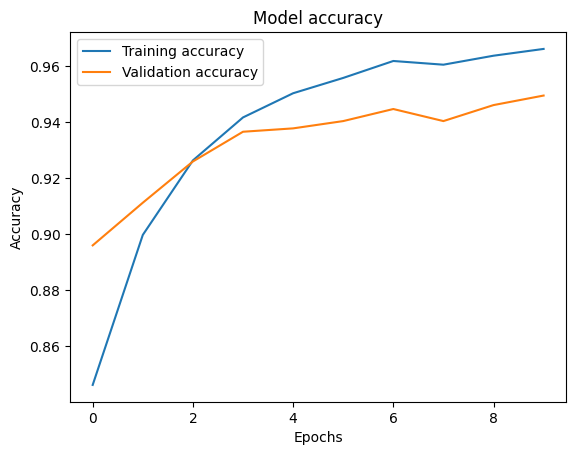

In [31]:
results = model.evaluate(x_test_flatten, y_test)
print("Loss = ", results[0])
print("Accuracy = ", results[1] * 100, "%")

plt.plot(history.history['accuracy'], label="Training accuracy")
plt.plot(history.history['val_accuracy'], label="Validation accuracy")
plt.title("Model accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()



Lets show our results on images from testing dataset

label: 
8       4       7       9       1       

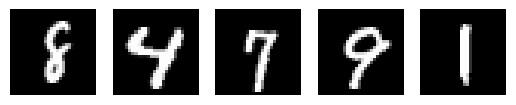

Predicted value: 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1      

In [34]:
n = 5
index = np.random.choice(len(y_test), n, replace=False)

print("label: ")
for i, ind in enumerate(index):
    plt.subplot(1, n, i+1)
    plt.imshow(x_test_flatten[ind].reshape(28, 28), cmap='gray')
    plt.axis("off")
    print(y_test[ind], end="       ")
plt.show()

print("Predicted value: ")
for i, ind in enumerate(index):
    probs = model.predict(x_test_flatten[ind].reshape(1, -1))
    digit = np.argmax(probs)
    print(digit, end="      ")

